In [52]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from PIL import Image, ImageOps
import collections

In [53]:
def load_routes(version="newest"):
    saved_routes = os.listdir("saved_routes")
    if version == "newest":
        version = sorted(saved_routes)[-1]
    with open(os.path.join('saved_routes',version), 'r') as f:
        # write the dictionary to the file in JSON format
        routes = json.load(f)
    return routes

def load_hold_setup(version="newest",return_version=False):
    saved_hold_setups = os.listdir("saved_hold_setups")
    if version == "newest":
        version = sorted(saved_hold_setups)[-1]
    with open(os.path.join('saved_hold_setups',version), 'r') as f:
        # write the dictionary to the file in JSON format
        home_wall = json.load(f)
    return home_wall, version.strip(".json")

def get_coordinates():
    h_hole_distance = [15]+[20]*11
    h_cumulative_hole_distance = [np.sum(h_hole_distance[:i+1]) for i in range(len(h_hole_distance))]
    v_hole_distance = [5]+[20]*14
    v_cumulative_hole_distance = [np.sum(v_hole_distance[:i+1]) for i in range(len(v_hole_distance))]
    return h_cumulative_hole_distance, v_cumulative_hole_distance

def plot_background(ax):
    ax.axis("off")
    # wandpanele
    for base_h in [0,150]:
        ax.plot([0,250,250,0,0],np.array([0,0,150,150,0])+base_h,color="k",linewidth=1.5,zorder=1)
    # doka tafeln einzeln
    for base_h in [0,50,100,150,200,250]:
        ax.plot([0,250,250,0,0],np.array([0,0,50,50,0])+base_h,color="grey",linewidth=.75,zorder=0)
    h_cumulative_hole_distance, v_cumulative_hole_distance = get_coordinates()
    # coordinaten
    alphabeth = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    for i,h in enumerate(h_cumulative_hole_distance):
        ax.text(h,310,alphabeth[i],va="center",ha="center")
        ax.text(h,-10,alphabeth[i],va="center",ha="center")
    for i,v in enumerate(v_cumulative_hole_distance):
        ax.text(-10,v,f"{i+1}",va="center",ha="center")
        ax.text(260,v,f"{i+1}",va="center",ha="center")
        
def plot_hold(ax,hold):
#    print(hold)
    ax.scatter(*hold["plot_coords"],color=hold["plot_color"],s=hold["plot_size"],edgecolor="k",linewidth=1)

def plot_all_holds(ax,holds):
    for hold_coords, hold in holds.items():
        plot_hold(ax,hold)
        
def trim_whitespace(path,padding=0):
    # Code from 
    # https://gist.github.com/thomastweets/c7680e41ed88452d3c63401bb35116ed
    
    padding = np.array([-1*padding, -1*padding, padding, padding])

    image=Image.open(path)
    image.load()
    imageSize = image.size
    # remove alpha channel
    invert_im = image.convert("RGB") 

    # invert image (so that white is 0)
    invert_im = ImageOps.invert(invert_im)
    imageBox = invert_im.getbbox()
    imageBox = tuple(np.asarray(imageBox)+padding)

    cropped=image.crop(imageBox)
    # print("Size:", imageSize, "New Size:", imageBox)
    cropped.save(path)

In [54]:
home_wall,version = load_hold_setup(return_version=True)
routes = load_routes()

# Plot Home Wall

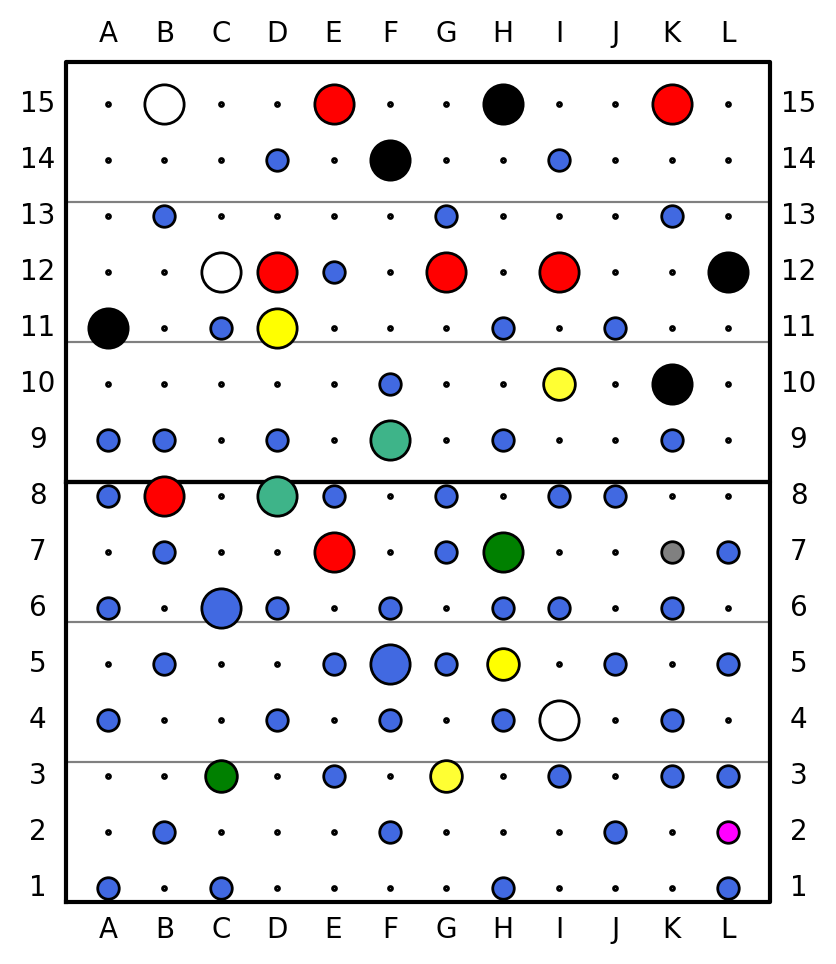

In [55]:
fig = plt.figure(dpi=200,figsize=(5,6))
ax = fig.add_subplot(111)
plot_background(ax)
plot_all_holds(ax,home_wall)
full_wall_path = f"plots/{version}_full_wall.png"
fig.savefig(full_wall_path)
trim_whitespace(path,10)
fig.show()

# Plot Routes

# Create README

In [112]:
def print_home_wall_info(home_wall):
    text = ""
    mounted_holds = []
    hold_colors = []
    hold_sizes = []
    for hold_coords,info in home_wall.items():
        if info["hold_mounted"]:
            mounted_holds.append(hold_coords)
            hold_colors.append(info["hold_color"])
            hold_sizes.append(info["hold_size"])
    nr_mounts = len(home_wall.keys())
    nr_mounted = len(mounted_holds)
    text += "\n\n| - | Nr. | % | \n"
    text += "|---|---|---|\n"
    text += f"| Einschlagmuttern | {nr_mounts:3.0f}  | {nr_mounts/nr_mounts*100:3.0f}% |\n"
    text += f"| Griffe           | {nr_mounted:3.0f} | {nr_mounted/nr_mounts*100:3.0f}% |\n\n"
    text += "|Grifffarben | Nr. | % |\n"
    text += "|---|---|---|\n"
    # print(f"Nr. Einschlagmuttern = {nr_mounts:3.0f}")
    # print(f"Nr. Griffe           = {nr_mounted:3.0f} ({nr_mounted/nr_mounts*100:3.0f}%)")
    # print("Grifffarben")
    for (color,nr) in collections.Counter(hold_colors).most_common():
        # print(f"{color:>10} = {nr:3.0f} ({nr/nr_mounted*100:2.0f}%)")
        text += f"|{color:>10} | {nr:3.0f} |{nr/nr_mounted*100:2.0f}%|\n"
    # print("Griffgrößen")
    text += "\n|Griffgrößen | Nr. | % |\n"
    text += "|---|---|---|\n"
    for (color,nr) in collections.Counter(hold_sizes).most_common():
        text += f"|{color:>10} | {nr:3.0f} | {nr/nr_mounted*100:2.0f}% |\n"
        # print(f"{color:>10} = {nr:3.0f} ({nr/nr_mounted*100:2.0f}%)")
    return text

In [113]:
print(print_home_wall_info(home_wall))



| - | Nr. | % | 
|---|---|---|
| Einschlagmuttern | 180  | 100% |
| Griffe           |  77 |  43% |

|Grifffarben | Nr. | % |
|---|---|---|
|      blue |  52 |68%|
|       red |   7 | 9%|
|     black |   5 | 6%|
|     white |   3 | 4%|
|     green |   2 | 3%|
|      mint |   2 | 3%|
|    yellow |   2 | 3%|
|      neon |   2 | 3%|
|      grey |   1 | 1%|
|   magenta |   1 | 1%|

|Griffgrößen | Nr. | % |
|---|---|---|
|         S |  52 | 68% |
|         L |  21 | 27% |
|         M |   4 |  5% |



In [114]:
text = "# My Bouldering Home Wall\n"
text += f"This is my setup as of {version}.\n\n"
text += f"![full_wall]({full_wall_path})\n\n"

text += "# Statistics\n"
text += "## Wall Statistics\n"
text += print_home_wall_info(home_wall)

with open("README.md","w") as file:
    file.write(text)